In [1]:
print("test")

test


In [2]:
import torch

# ref :  
http://blog.ezyang.com/2019/05/pytorch-internals/

## Concepts Tensor

Tensors are multidimensional arrays or nd-arrays for short. 

A scalar is a 0 dimensional tensor

A vector is a 1 dimensional tensor

A matrix is a 2 dimensional tensor

A nd-array is an n dimensional tensor


Tensors allow us to drop these specific terms and just use an n to identify the number of dimensions we are working with.

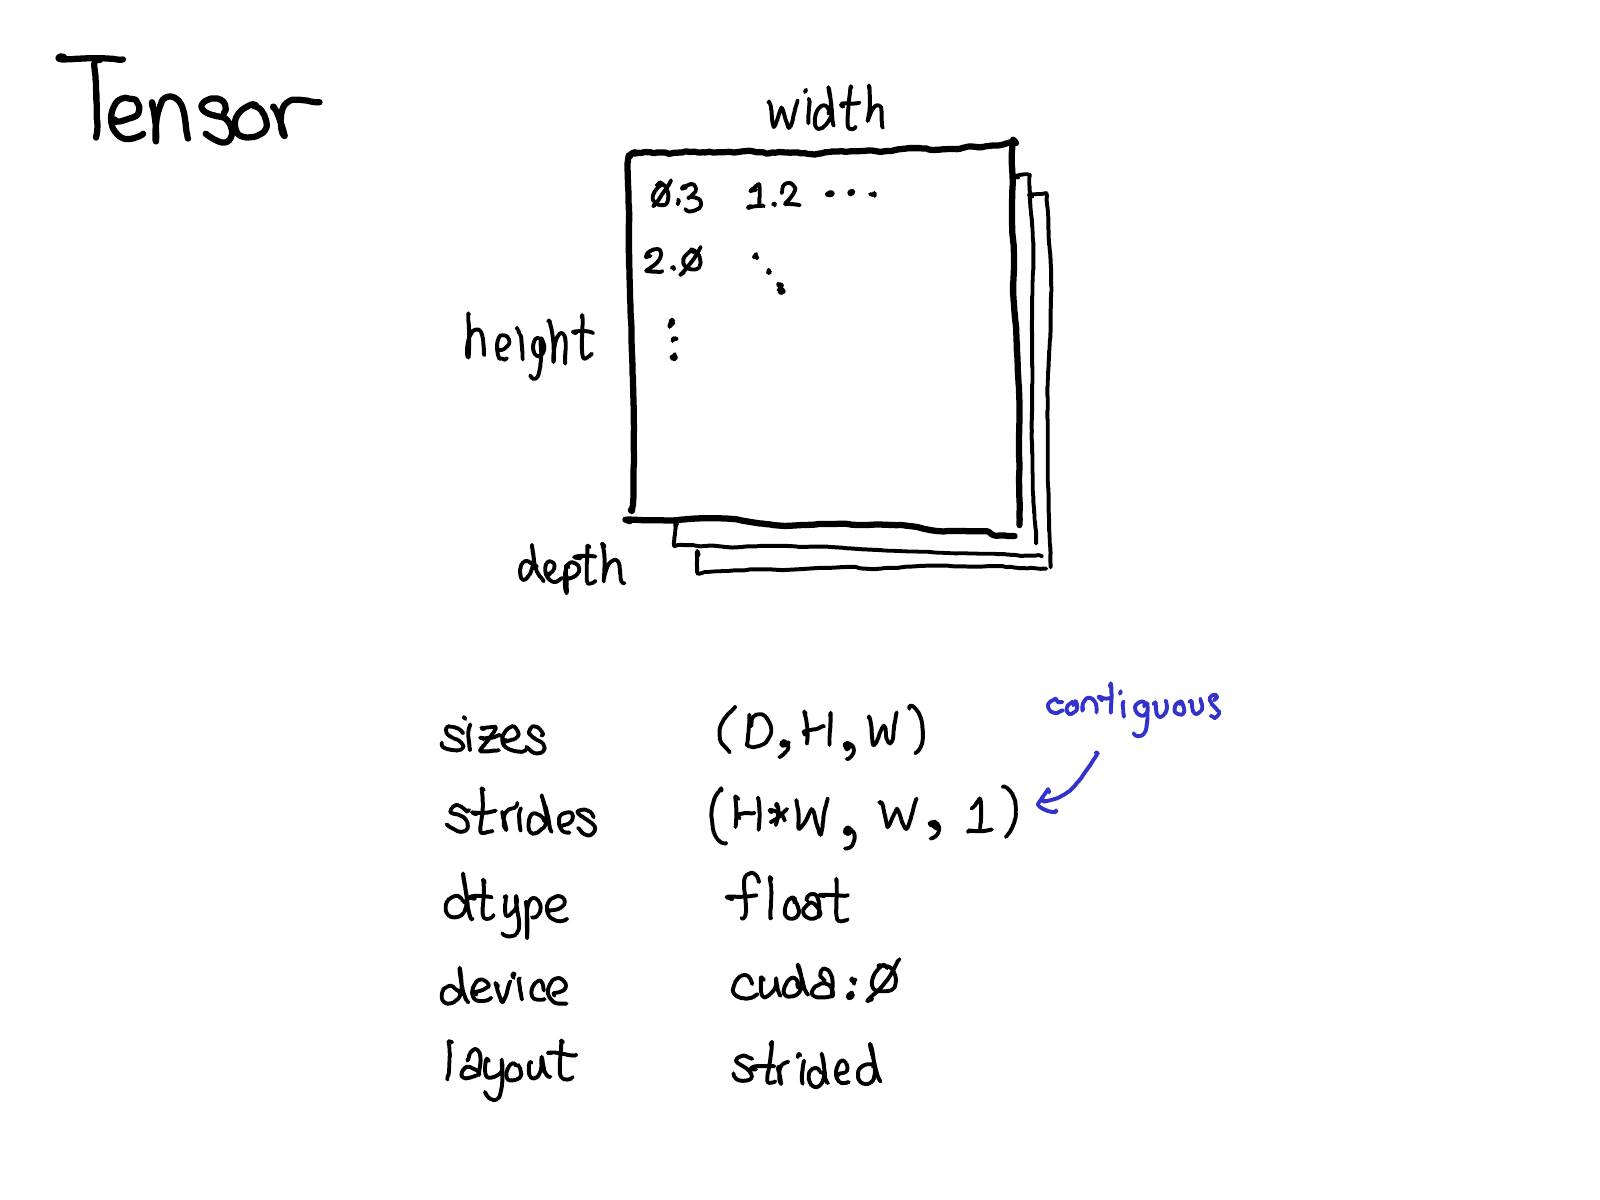

In [11]:
#Concept of index
# 1 index
d =[1,2,3]
#2d 2 index
dd = [
[1,2,3],
[4,5,6],
[7,8,9]
]
dd
#3d 3 index
ddd = [[[1,2],[1,3],[2,4]]]
ddd

[[[1, 2], [1, 3], [2, 4]]]

In [33]:
# to locate 3 in dd, need 2 indexes
print(dd[0][2])
# to locate 3 in d, need one index
print(d[2])
# to locate 3 in ddd we need 3 index
#print(d[[2][0]]) #check

3
3


Tensor: main datastructure, n-dim data structure and some metadata      
        describing the datastrucure.
        
        size, dtype, device(cpu or cuda) 
        
        and stride (pytorch specific)
        
        

# Stride

Tensor is mathematical concept, stride describes the physical representation of the logical concept, tensor. Each element of the tensor is offset by 4 bytes in contiguous memory. 

How to access tensor[1,0] which is a logical representation?

Stride works out the physical location from the logical representation:

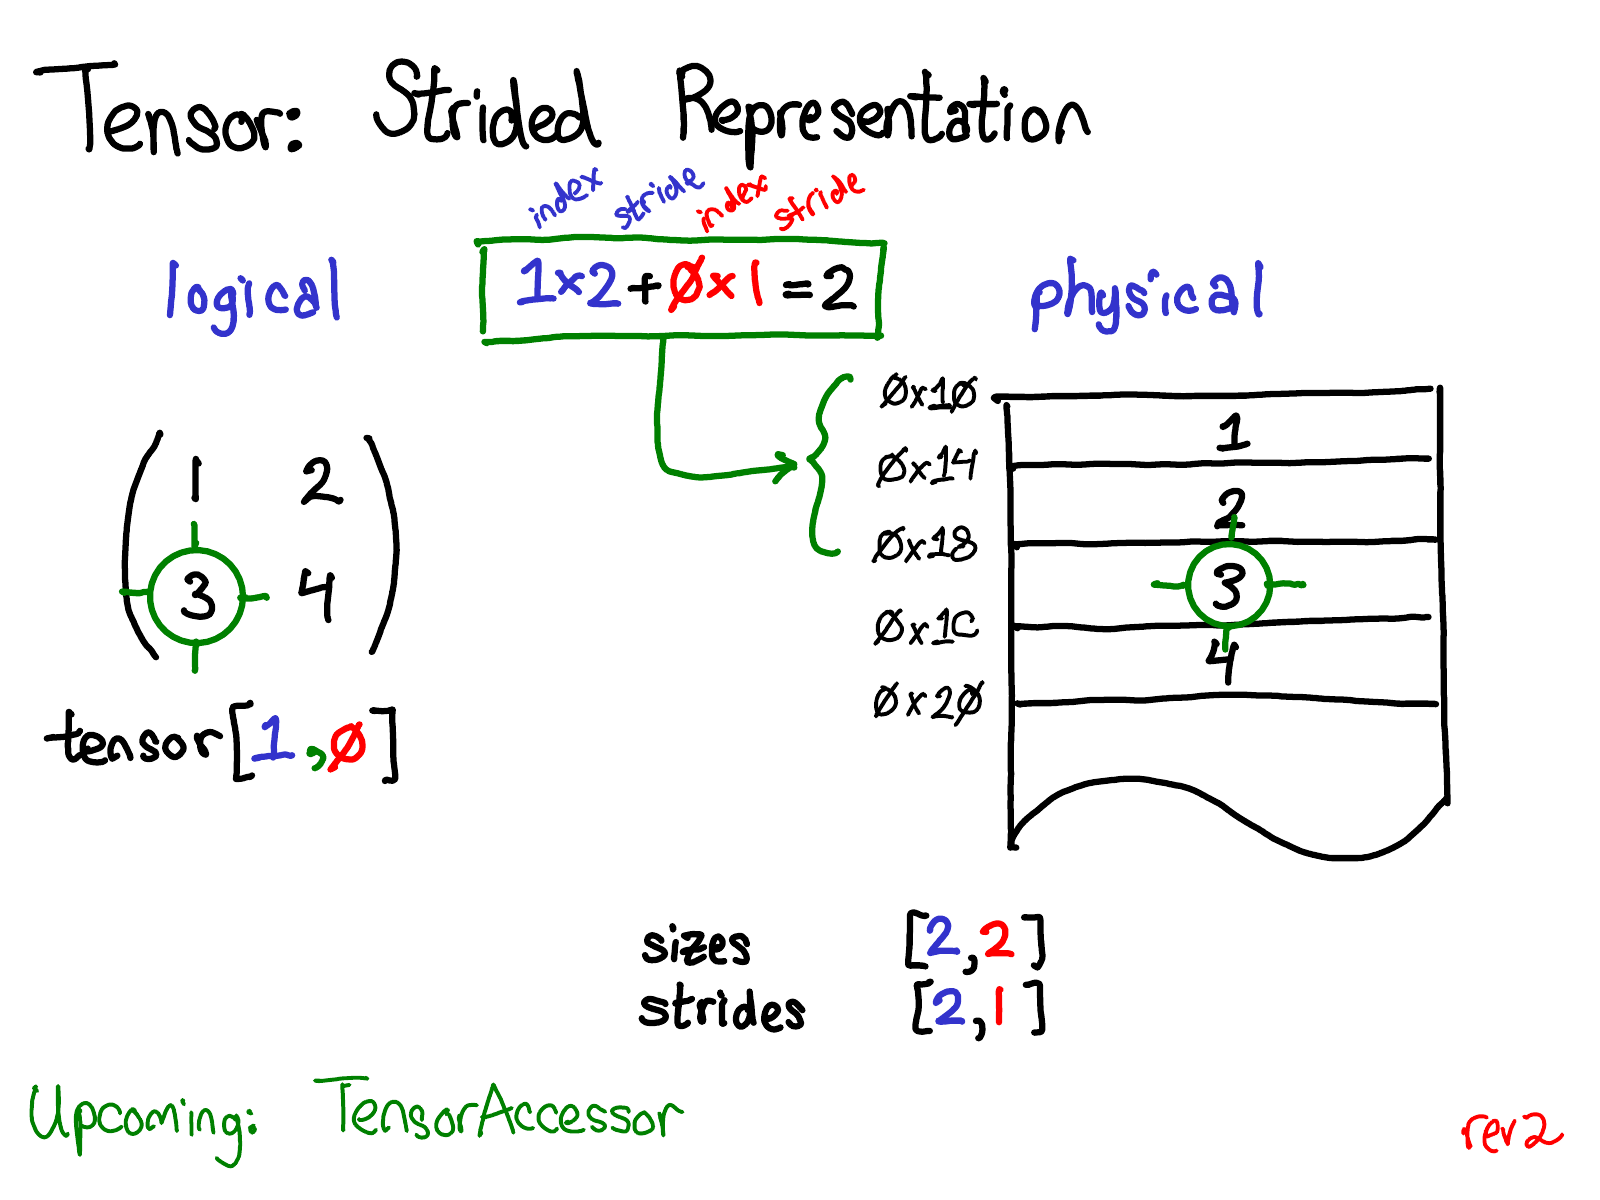


# Tensor Accessor

How to access tensor[1,:] which is a logical representation?

Stride works out the physical location from the logical representation:

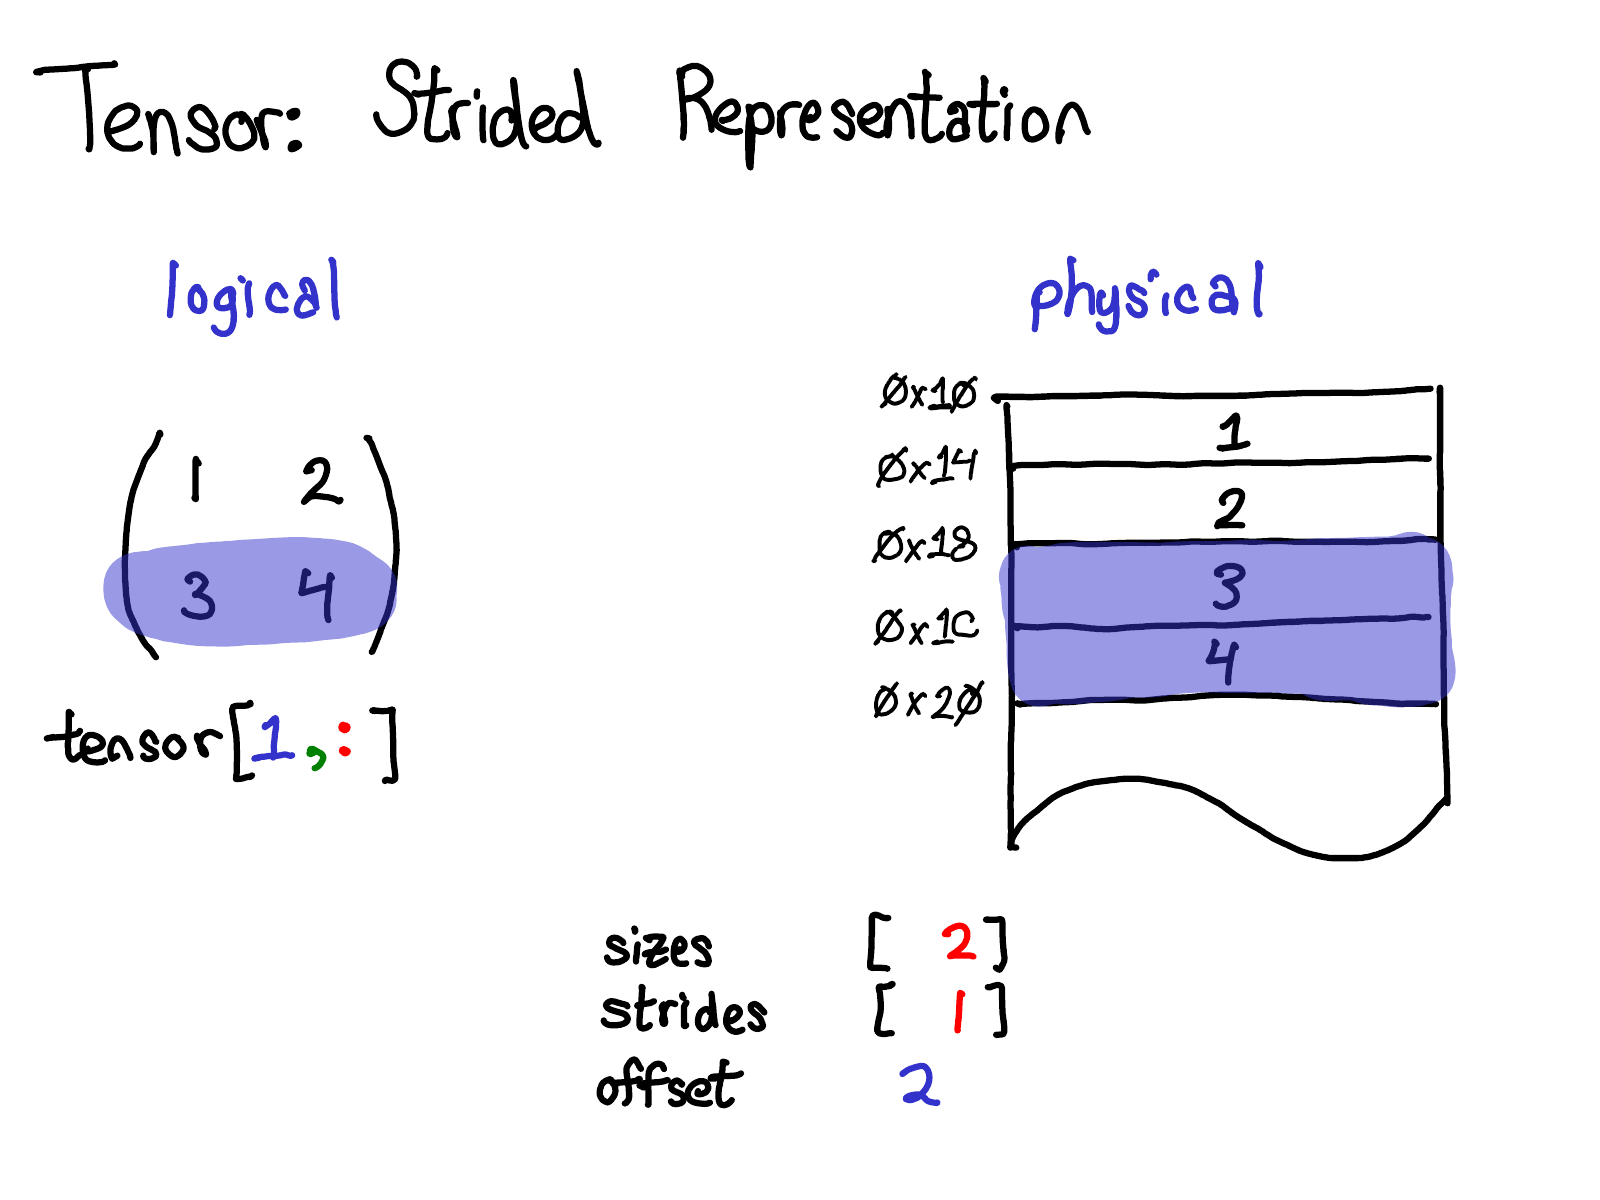


How to access tensor[:,0] which is a logical representation?

Stride works out the physical location from the logical representation:

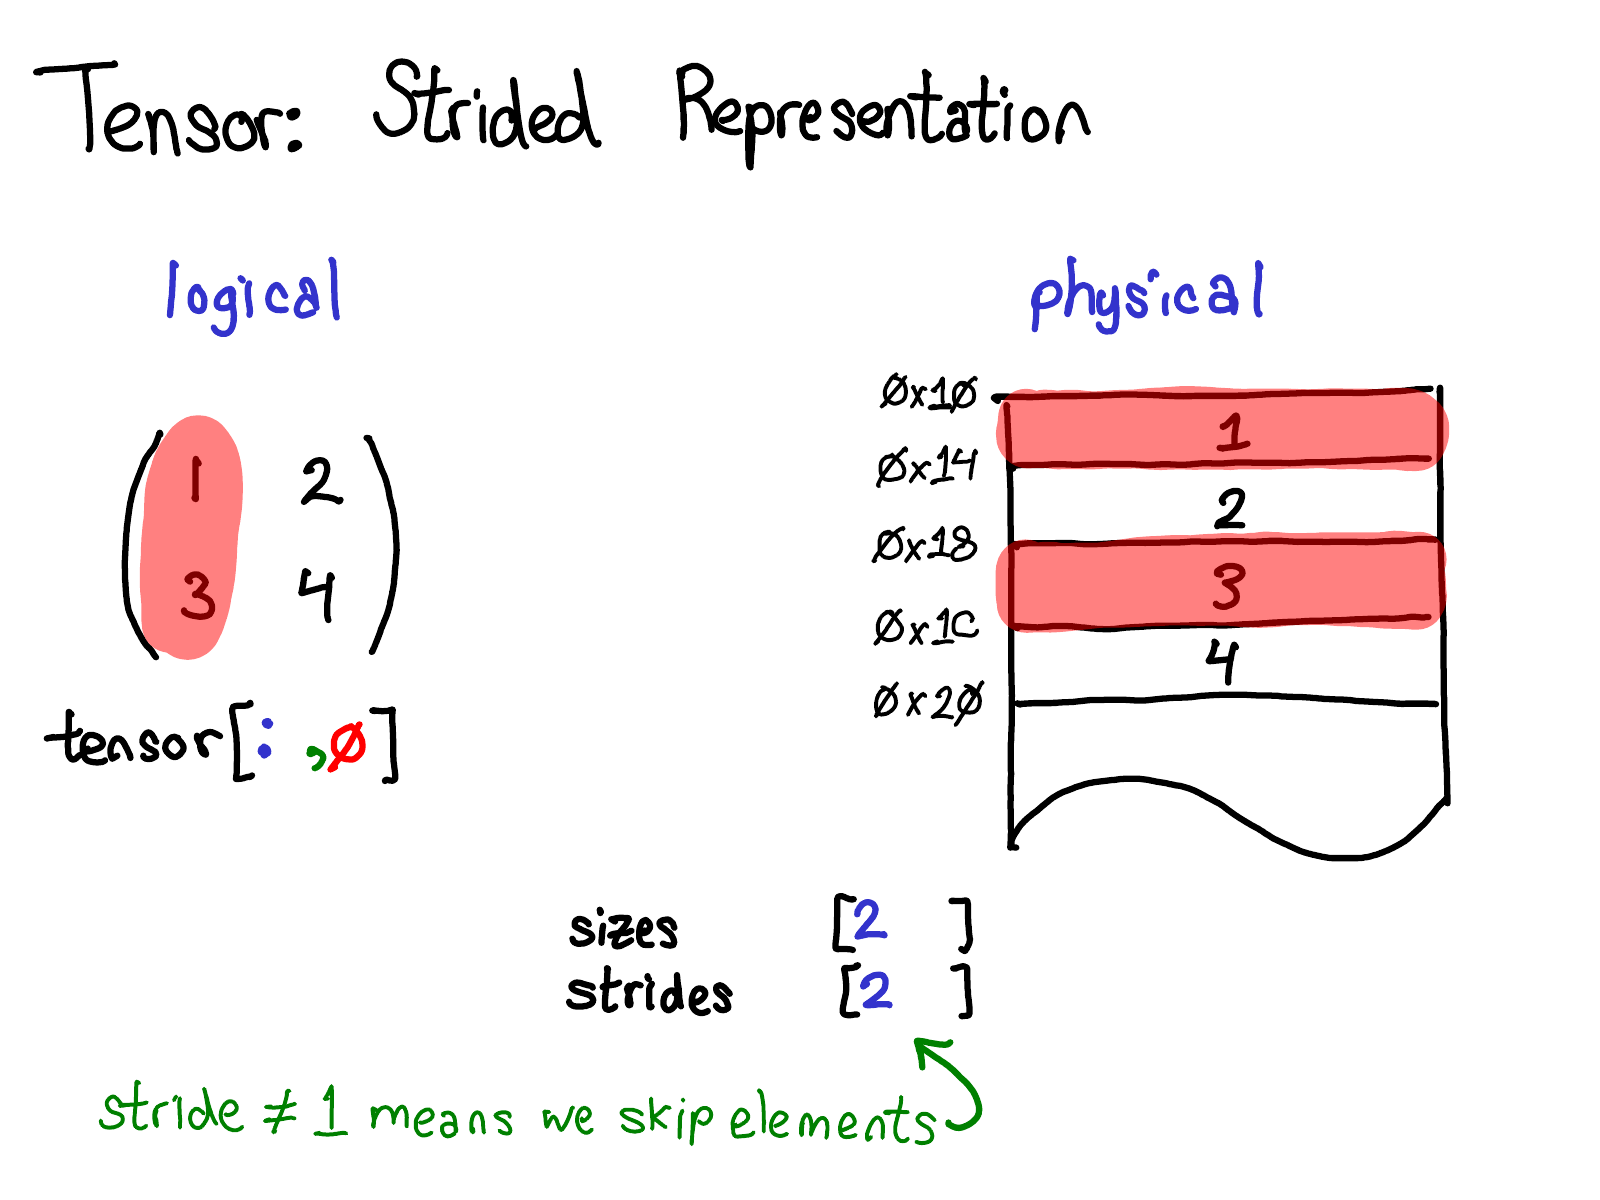

stride=2, means between 2 elements jump by 2.


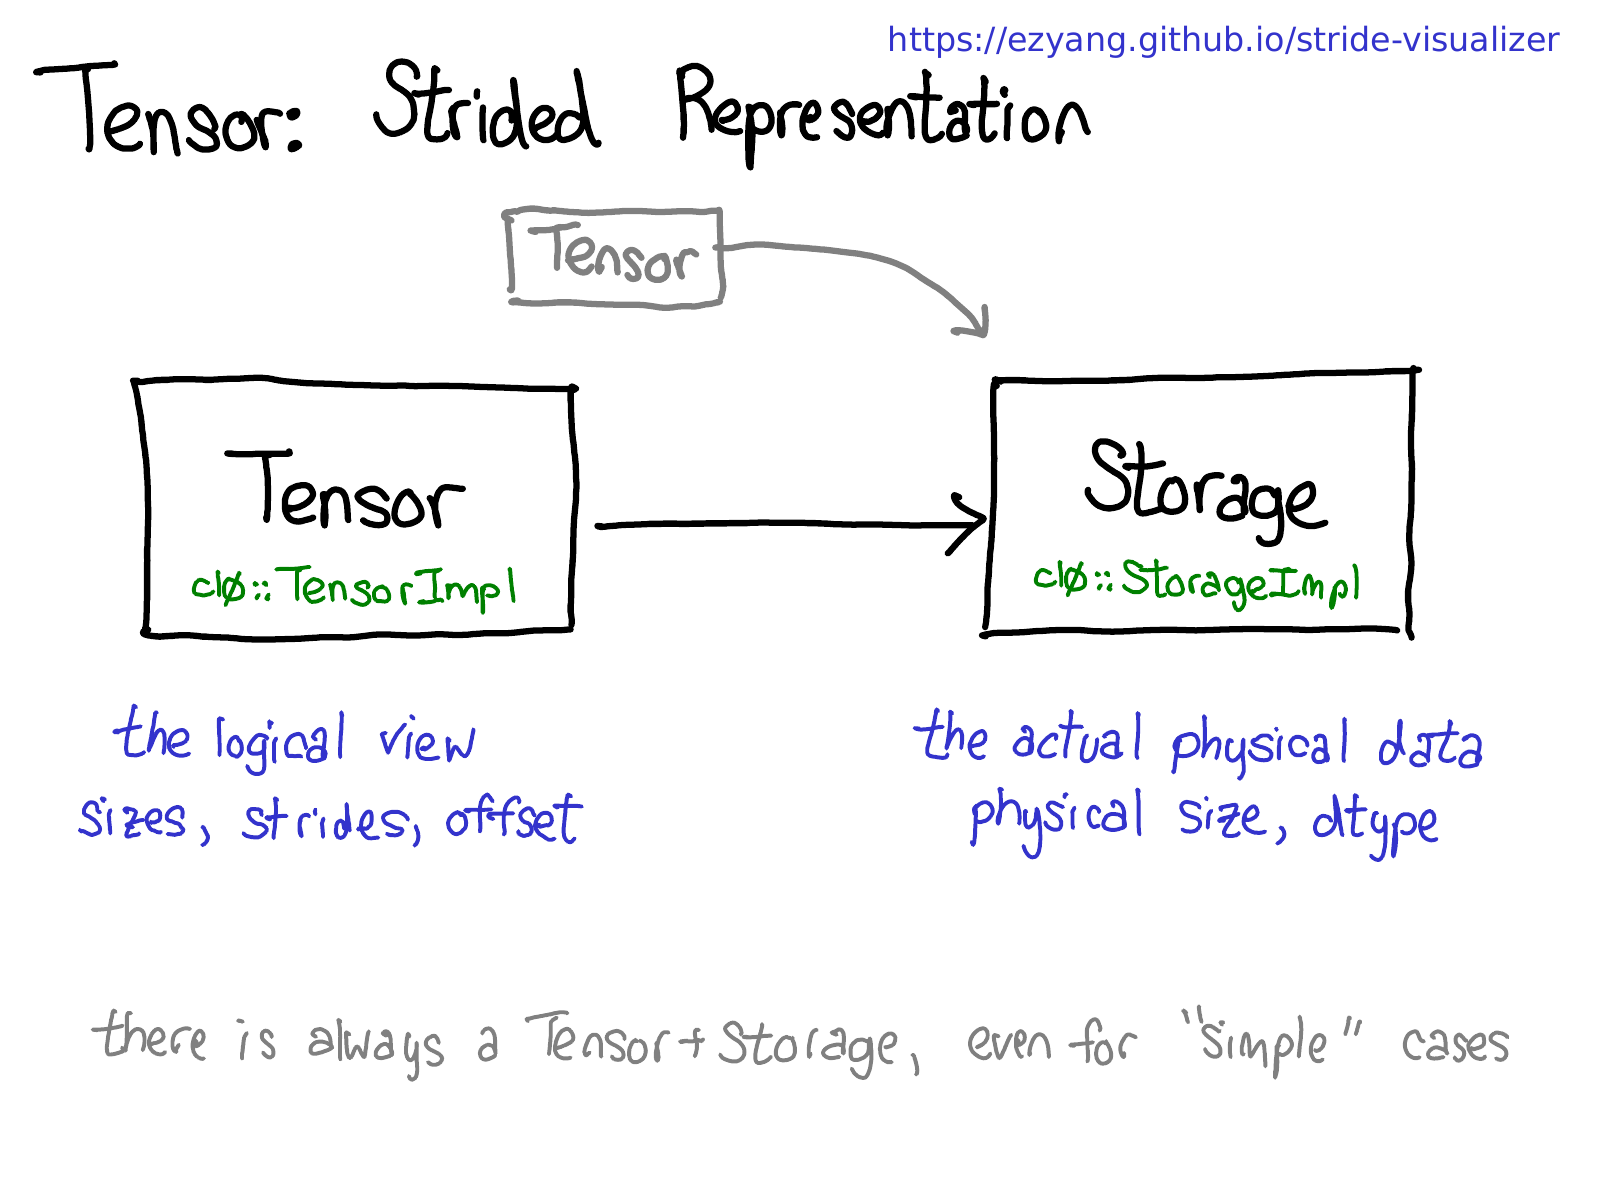

In [6]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

here no storage is required.. 

## Operations implemented on the tensor

torch.mm - there are 2 dynamic dispatches,

           a) based on device type - cpu tensor (libcaffe2.so)/cuda (libcaffe2_gpu.so)tensor etc
           
           b) dispatch based on datatype like float, int etc a swich among all different data types.
           
  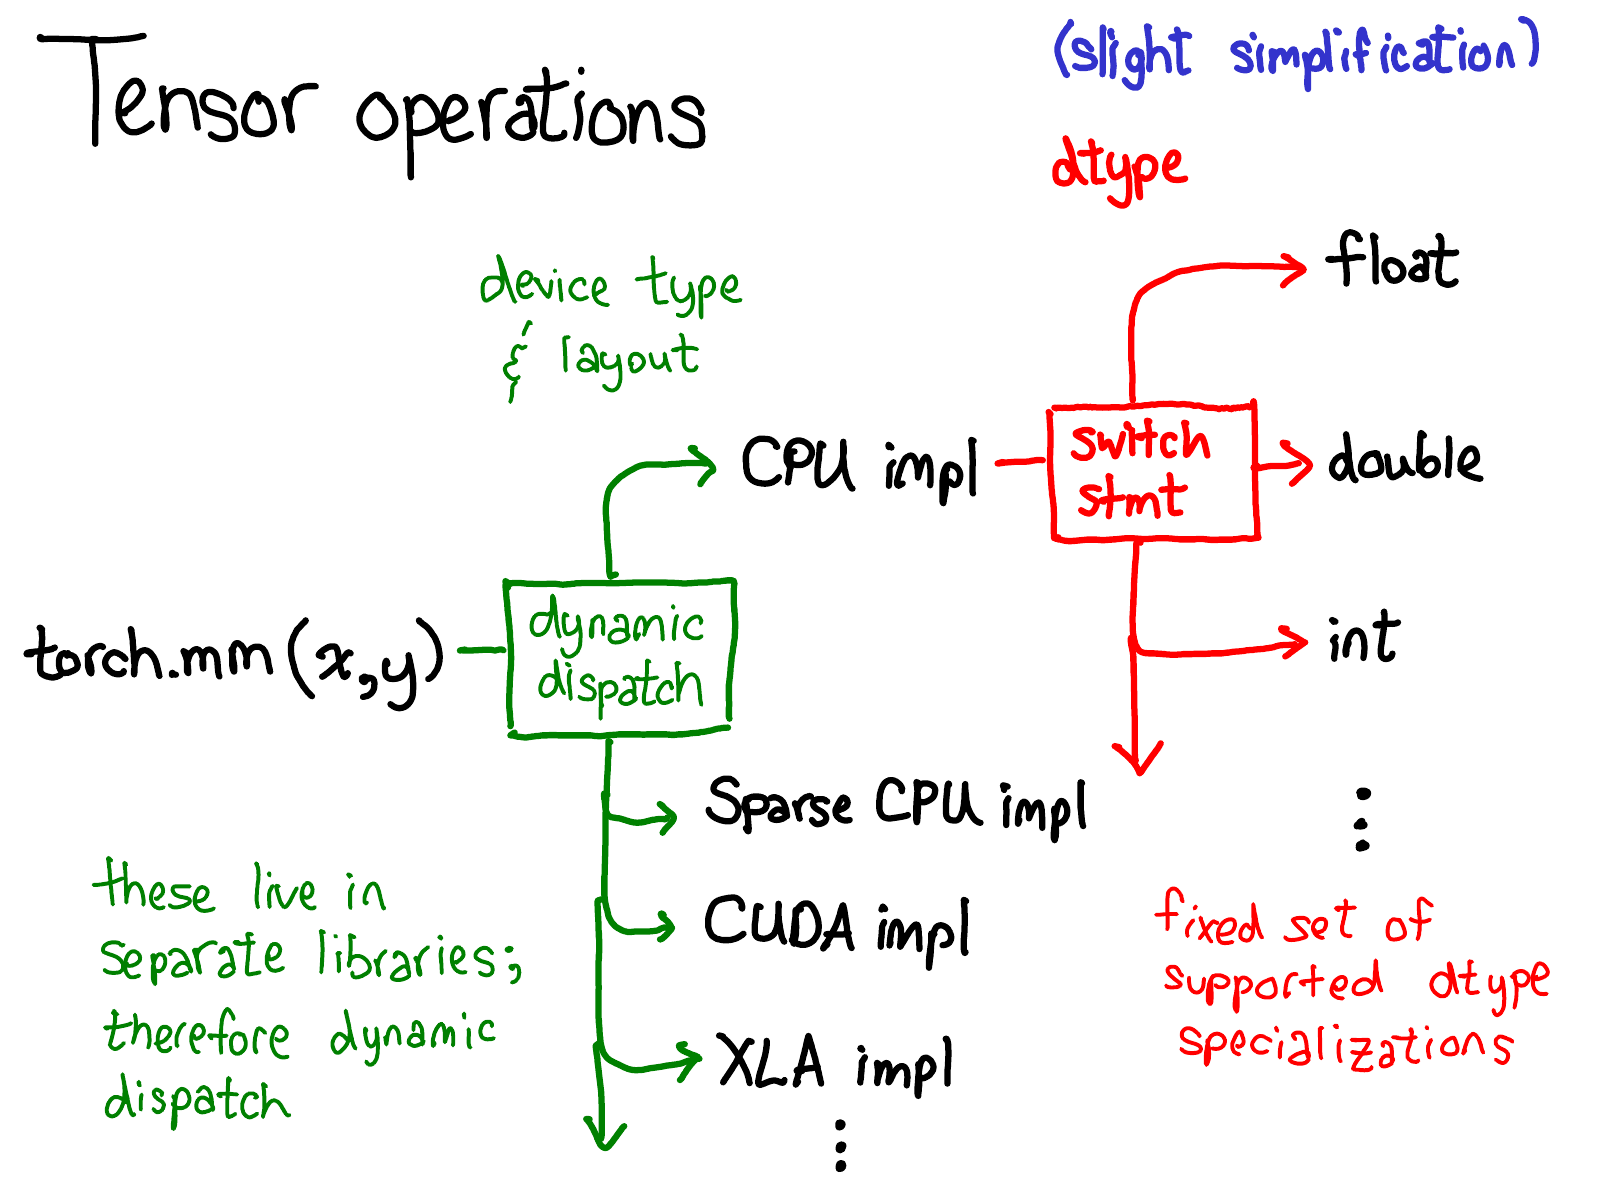   

(defined in the TensorImpl struct <https://github.com/pytorch/pytorch/blob/master/c10/core/TensorImpl.h> )

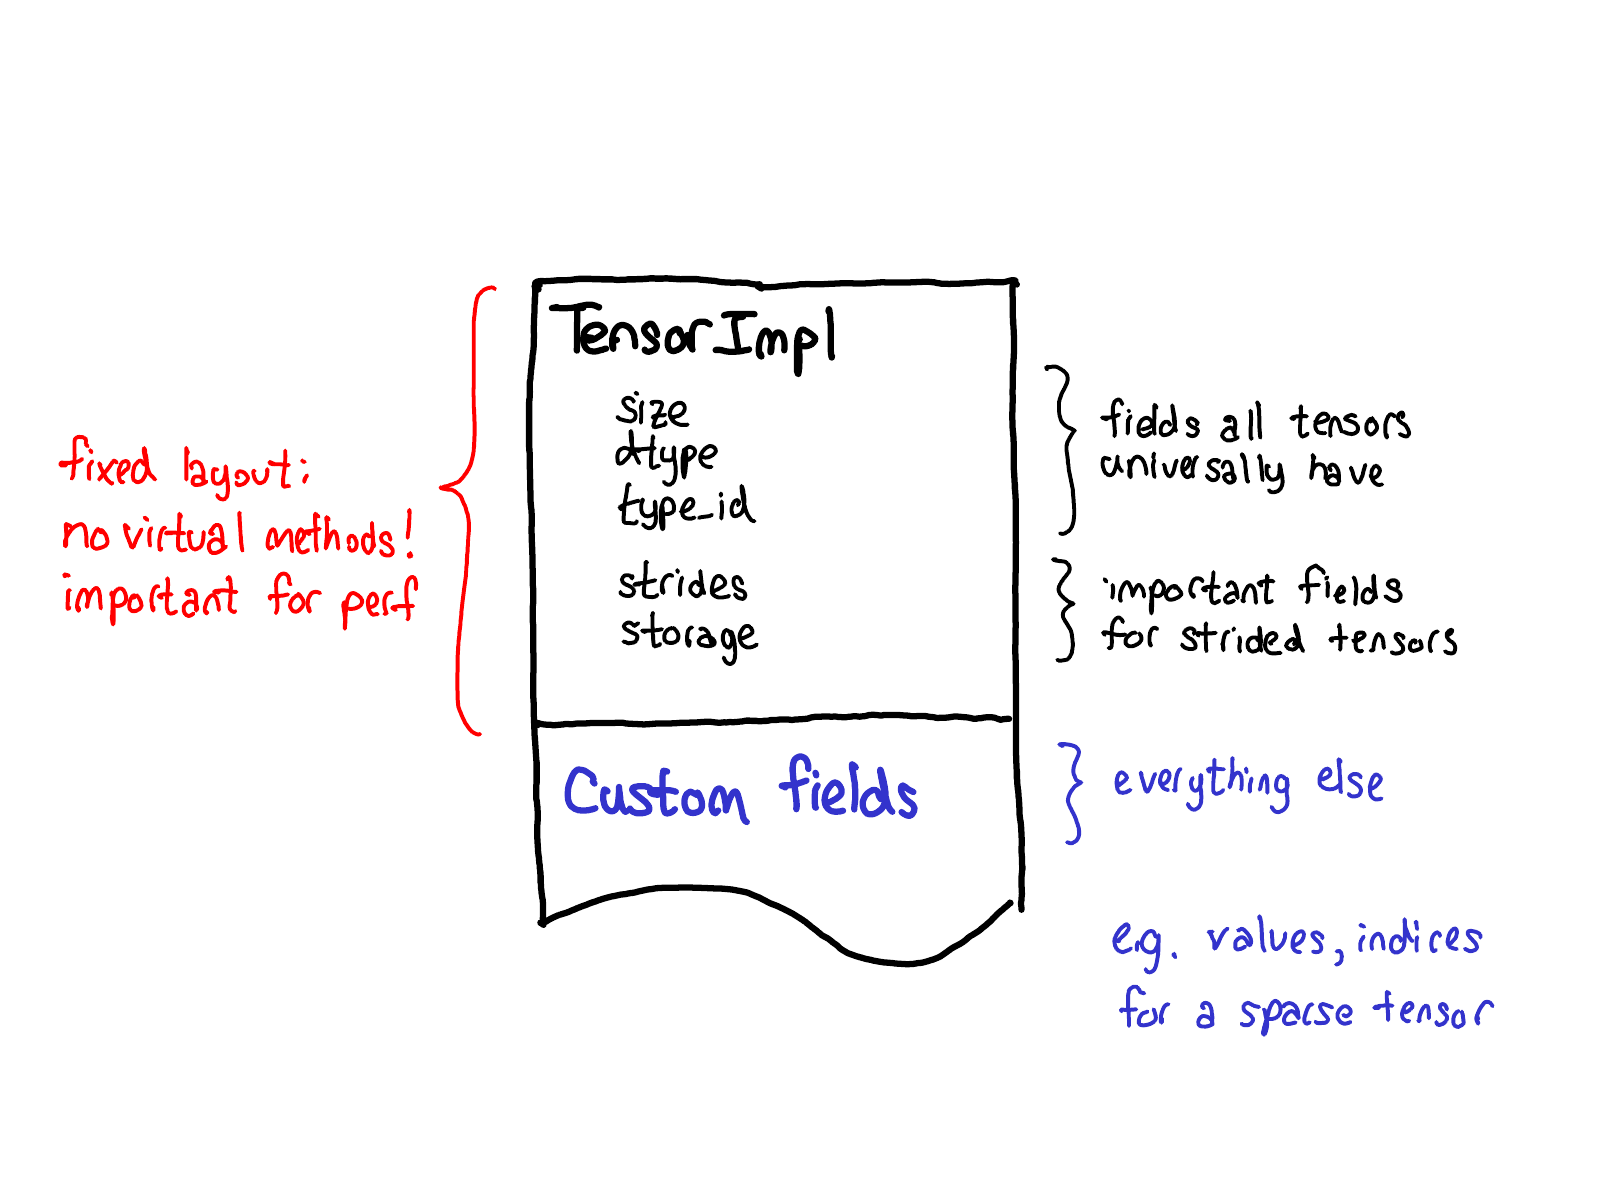

## Code structure

https://github.com/pytorch/pytorch

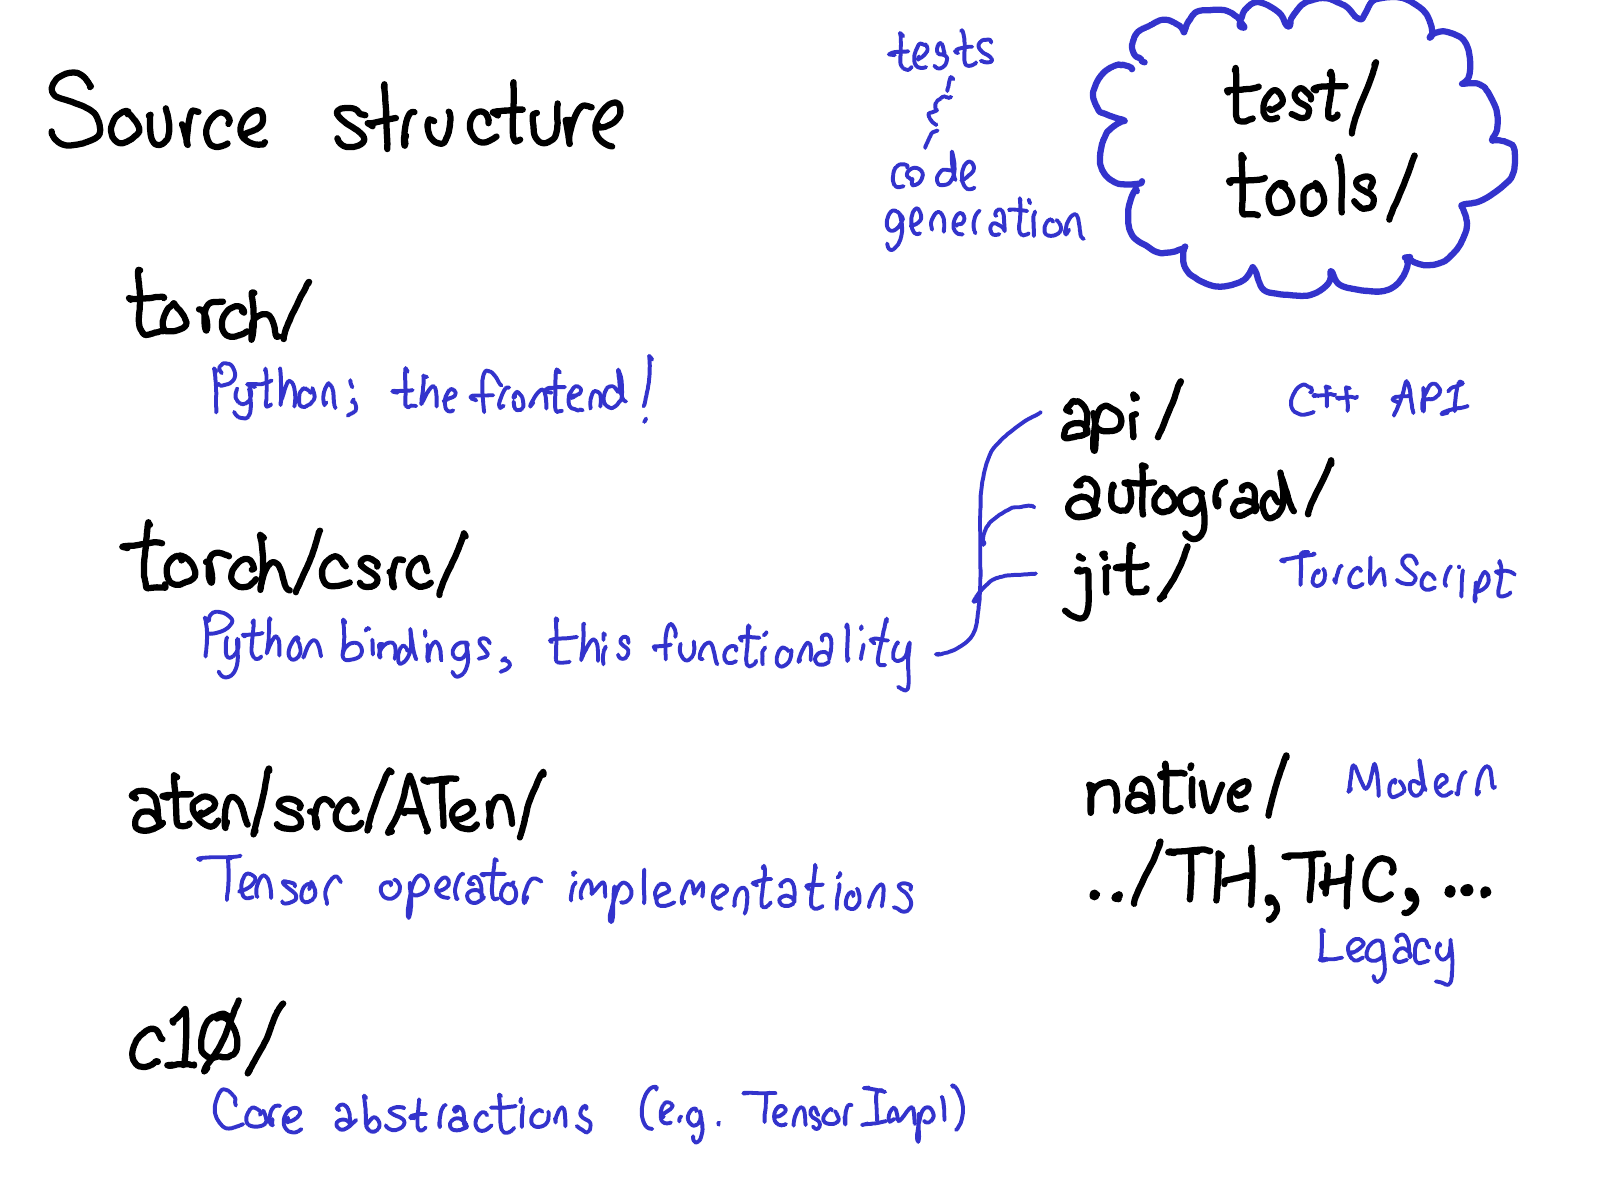

##  Concept of Rank, Axes And Shape - Tensor attributes - all are connected to the concept of indexes

#rank of tensor = number of dim. (example, rank-2 tensor, means 2d-tensor or 2 axes). Rank tells us how many indexes required to access an element in the tensor.


example above d = [1,2,3] is a rank 1 tensor, need one index to reach an element. d[2] = 3

              dd = [[1,2,3],
                    [4,5,6],
                    [7,8,9]
                   ]
                   
               dd is a Rank 2 Tensor or 2 axis, so 2 indexes required to access an element
               
               dd[0][2] = 3
               

#axes = length of a tensor

#shape = length of axes, for dd each axes has 3 index

dd.shape = [3,3]


In [40]:
t = torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [41]:
type(t)

torch.Tensor

In [42]:
t.shape

torch.Size([3, 3])

## Reshaping a tensor

In [50]:
t1 =t.reshape(1,9) # reshape to 1 in the 1st axes and 9 in the 2nd axes
                   # length of axes 1 is 1 and length of axes 2 is 9
                   # reshape does not change the underlying datalength.
t1

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [48]:
t1.shape

torch.Size([1, 9])

# Tensor example

In CNN

Image 224x224 image HxW height and width

color channel RBG

Batch of images 

[ B,C,H,W ]



[4,   1, 224, 224] - rank 4 tensor -- CNN input shape of 
                     len([4, 1, 224, 224]) = 4 axis

 A0, A1, A2,   A3  - A0,A1,A3,A4  are the axis, 
 
 length of each axis gives the values of Batch size (A0, no of images in the batch) , channel (A1, RBG color), height (A2) and width  (A3).
 
 A0, A1 and A2 are multi-dim arrays
 A3 contains the data value.

## pytorch tensor

In [55]:
# attributes, dtype, device, layout

# dtype -- torch.int32, torch.float64 or torch.cuda.FloatTensor  etc
t11 = torch.tensor([1,2,3])
t12 = torch.tensor([1.,2.,3.])
t31 = t11 + t12
print(t31)
print(t11.dtype, t12.dtype)
# device -- cpu or gpu, torch.device('cuda:0')
device = torch.device('cuda:0') # -- 1st gpu
device
#device(type='cuda', index=0)

# layout -- strided as explained above - how the memory layout.


tensor([2., 4., 6.])
torch.int64 torch.float32


device(type='cuda', index=0)

# pytorch dynamic graph

In [61]:
import torch
import numpy as np

data =  np.array([1,2,3])
t1 = torch.Tensor(data) # capital T, constructor
print(t1, t1.dtype) # constructor uses global dtype which is float.
print(torch.get_default_dtype())
t2 = torch.tensor(data) # snmall t, factory # detype is based on incoming data 
                        #           data inference
print(t2)
t22 = torch.tensor(data, dtype=torch.float64)
print(t22) # incoming data type is int but converted to flat as specified
t3 = torch.as_tensor(data) #factory
print(t3)
t4 = torch.from_numpy(data) #factory
print(t4)

tensor([1., 2., 3.]) torch.float32
torch.float32
tensor([1, 2, 3])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1, 2, 3])
tensor([1, 2, 3])


## Sharing data

In [67]:
# 
data = np.array([1,3,4])
print(data) #data
t21 = torch.Tensor(data) # copy - 
print(t21)
t22 = torch.tensor(data) # copy -- *** most commonly used
print(t22)
t23 = torch.as_tensor(data) # shared -- memory efficient -- ** can accept any data
print(t23) 
t24 = torch.from_numpy(data) #shared -- efficient -- accepts only numpy data
print(t24)

#modify data
data[0] = 2
data[1] = 4
data[2] = 5

print(t21) #- no changes  as it copy
print(t22) #- no chnages as it's a copy
print(t23) # shared so changed
print(t24) # shaped so changed.

[1 3 4]
tensor([1., 3., 4.])
tensor([1, 3, 4])
tensor([1, 3, 4])
tensor([1, 3, 4])
tensor([1., 3., 4.])
tensor([1, 3, 4])
tensor([2, 4, 5])
tensor([2, 4, 5])


## Tensor operation types

1. Reshaping operation

2. Element-wise operation

3. Reduction operations

4. Access Operations


In [78]:
#reshape op -- very important
t31 = torch.tensor([
                     [1,1,1,1],
                     [2,2,2,2],
                     [3,3,3,3]
], dtype=torch.float32)
print("number of axis : ", len(t31.shape))
# 2 axis, len of axis 0 is 3 or 3 rows 
#         len of axis 1 is 4 or 4 col
print(t31.shape )
print(t31.size() )

# imporant information provided by shape is the number of scalar components
print(t31.shape[0] * t31.shape[1]) #or
print(torch.tensor(t31.shape).prod())
print(t31.numel()) # num of elemets important for reshaping purpose.


number of axis :  2
torch.Size([3, 4])
torch.Size([3, 4])
12
tensor(12)
12


# 1. reshape and squeeze

In [117]:
print(t31.reshape(1,12))
print(t31.reshape(1,12).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


##  1.1 squeeze and unsqueeze
squeeze - remove dimension

flatten a tension - contains all scalar components.

unsqueeze - adds dimension

In [118]:
def flatten(t):
    t = t.reshape(1,-1)
    t = t.squeeze()
    return t
t311 = flatten(t31)
print(t311) # one axis is removed
print(t311.shape) # this size is torch.Size([12]) different from torch.Size([1, 12])

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [119]:
print(t311.unsqueeze(dim=0)) #add dimension, dim 0 - row, 1 columns

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


## 1.2 Cat operation


In [120]:
t41 = torch.tensor([[1,2], [3,4]])
t42 = torch.tensor([[5,6], [7,8]])

In [121]:
torch.cat((t41,t42), dim=1) #dim 0 - row wise, 1 col wise

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

## 1.3 Flatten
image 24x24

In [122]:
# stack
t51 = torch.tensor([
                    [1,1,1,1],
                    [1,1,1,1],
                    [1,1,1,1],
                    [1,1,1,1],
])
t52 = torch.tensor([
                    [2,2,2,2],
                    [2,2,2,2],
                    [2,2,2,2],
                    [2,2,2,2],
])
t53 = torch.tensor([
                    [3,3,3,3],
                    [3,3,3,3],
                    [3,3,3,3],
                    [3,3,3,3],
])

t52

#stack along row dim=0
tt5 = torch.stack((t51,t52,t53))
print(tt5) #
print(t51.shape)
print(tt5.shape) #stack adds anew axis od size 3

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])
torch.Size([4, 4])
torch.Size([3, 4, 4])


## 1.4 reshape to [B,C,H,W]

In [123]:
tt55 = tt5.reshape(3,1,4,4) #number of elem is same
print(tt55)

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])


tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])
          
      1. batch - 1st axis
      
      2. channel - 2nd axis
      
      3. 

In [124]:
tt55[0]

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [125]:
tt55[0][0]

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [126]:
tt55[0][0][0]

tensor([1, 1, 1, 1])

## 1.5 flatten - different ways

In [127]:
tt55_1 = tt55.reshape(-1)
print(tt55_1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [128]:
tt55_2 = tt55.reshape(1,-1)[0]
print(tt55_2)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [129]:
tt55_3 = tt55.flatten() # pytorch flatten function
print(tt55_3)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


## 1.6 - 3 color channels


In [130]:
tt55_4 = tt55.flatten(start_dim=1) #flatten within each channel
print(tt55_4)
print(tt55_4.shape)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])
torch.Size([3, 16])


# 2. element wise operation

In [134]:
tt61 = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
tt62 = torch.tensor([[9,8],[7,6]], dtype=torch.float32)
print(" 1st axis ", tt61[0])
print(" 2nd axis ", tt61[0][0])
print(" corresponding elemts ", tt61[0][0], tt62[0][0])

 1st axis  tensor([1., 2.])
 2nd axis  tensor(1.)
 corresponding elemts  tensor(1.) tensor(9.)


## 2.1 elem wise op on same shape tensor - arithmatic operations with scalar values. scalar value is a rank 0 tensor

In [137]:
tt61+2 # tt61 is rank2 tensor and 2 is scalar rank 0 tensor - use implicit broadcasting
# +, - / and add sub mul, div also works

tensor([[3., 4.],
        [5., 6.]])

### tensor broadcasting, tensor of different shape treated during elem wise operation.

In [139]:
tt61+2


tensor([[3., 4.],
        [5., 6.]])

In [144]:
# using broadcasting performing elem wise
tt61 + torch.tensor(
             np.broadcast_to(2,tt61.shape),
             dtype=torch.float32)

tensor([[3., 4.],
        [5., 6.]])

####  lower rank tensor is matched to higher rank tensor - broadcast

In [145]:
#say
tt63 = torch.tensor([2,4], dtype=torch.float32)
tt61 + tt63 # rank of tt62 is 1 and rank of tt61 is 2


tensor([[3., 6.],
        [5., 8.]])

In [148]:
#using broadcast
np.broadcast_to(tt63.numpy(), tt61.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [149]:
tt61 + tt63

tensor([[3., 6.],
        [5., 8.]])

### comparison op

In [153]:
tt61.ge(1) # le, eq

tensor([[True, True],
        [True, True]])

# Tensor Reduction operation like sum, mean, std, prod -- aggregate

In [154]:
tt71 = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
tt71.sum() 

tensor(10.)

In [161]:
#pass dim parameter
tt72 = torch.tensor([
                     [1,1,1,1],
                     [2,2,2,2],
                     [3,3,3,3],
], dtype=torch.float32)
#reducing the tensor with respect an axis
tt72.sum(dim=0) #dim=0 col wise dim=1 row wise

tensor([6., 6., 6., 6.])

### argmax max and axis

In [172]:
#single index val containing the max value
tt73 = torch.tensor([
                     [1,0,0,2],
                     [0,3,3,0],
                     [4,0,0,5],
], dtype=torch.float32)

In [173]:
#argmax
tt73.argmax() #gives the index of the max

tensor(11)

In [174]:
#max
tt73.max(dim=0)

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [175]:
tt73.max(dim=1)

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 1, 3]))

In [176]:
#mean
tt73.mean()

tensor(1.5000)

In [177]:
#mean along axis=0
tt73.mean(dim=0)

tensor([1.6667, 1.0000, 1.0000, 2.3333])

In [178]:
#to list
tt73.mean(dim=0).tolist()

[1.6666666269302368, 1.0, 1.0, 2.3333332538604736]

In [179]:
#to numpy array
tt73.mean(dim=0).numpy()

array([1.6666666, 1.       , 1.       , 2.3333333], dtype=float32)